In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from datetime import date
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
lending_club = pd.read_csv('loan.csv', encoding = "ISO-8859-1")

In [3]:
print(lending_club.shape)
lending_club.head()

(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
lending_club.drop(lending_club.iloc[:,53:110], axis=1, inplace=True)

In [5]:
lending_club.drop(['pymnt_plan', 'total_il_high_credit_limit', 'initial_list_status',
                   'collections_12_mths_ex_med', 'mths_since_last_major_derog',
                  'application_type', 'policy_code', 'url'], axis=1, inplace=True)

In [6]:
print(lending_club.shape)
print(lending_club.columns)

(39717, 46)
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d'],
      dtype='object')


In [7]:
lending_club['next_pymnt_d'].fillna(0, inplace=True)
lending_club["emp_title"].fillna("Not Given", inplace = True)
lending_club['zip_code'] = lending_club['zip_code'].map(lambda x: x.rstrip('xx'))

In [8]:
lending_club.isna().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec                        0
revol_bal 

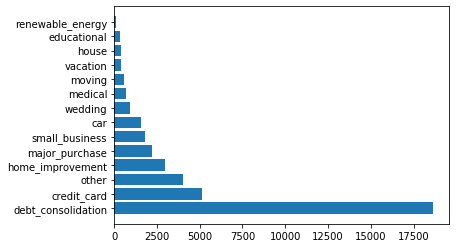

In [35]:
plt.barh(lending_club['purpose'].value_counts().index, lending_club['purpose'].value_counts().values)
plt.show()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

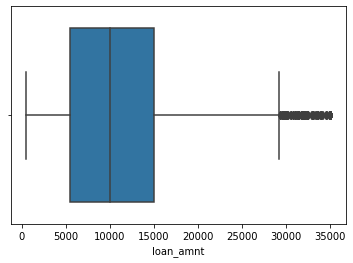

In [39]:
sns.boxplot(lending_club['loan_amnt'])
lending_club['loan_amnt'].describe()

In [48]:
#Outlier (Q3+1.5*IQR) = 15000+1.5*(15000-5500) = 29250
lending_club['loan_amnt'][lending_club['loan_amnt']>=29250].count()


1230

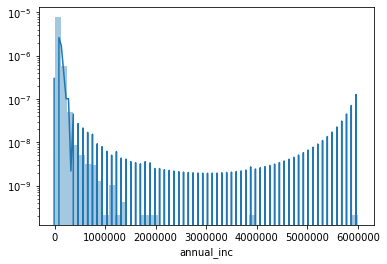

In [55]:
sns.distplot(lending_club['annual_inc'], hist_kws = {'log':True})
plt.show()

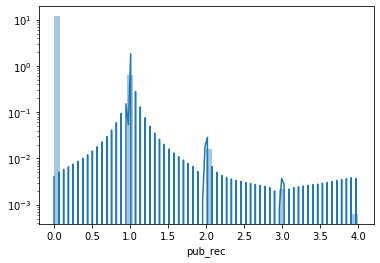

In [58]:
sns.distplot(lending_club['pub_rec'],hist_kws={'log':True})

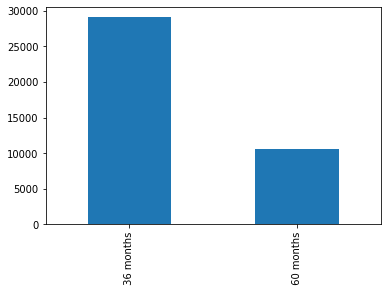

In [59]:
lending_club['term'].value_counts().plot.bar()

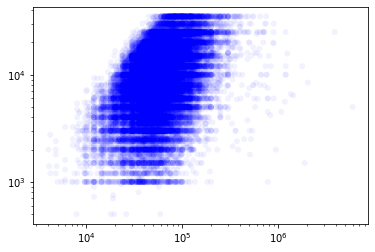

In [69]:
plt.gca().scatter(lending_club['annual_inc'], lending_club['loan_amnt'], c='blue', alpha=0.05, edgecolors='none')
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')

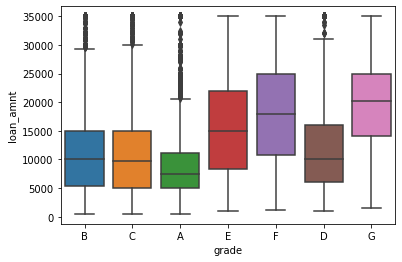

In [73]:
sns.boxplot(x=lending_club['grade'], y=lending_club['loan_amnt'])

In [75]:
#Following conclusions can be drawn from the plot above :
#     the median loan amount for grade B and C is almost same and the interquartile range is also almost equal
#     The median loan amount for grade A is the least and also the interquartile range is the smallest
#     The grades E and F are offered loans in the same ranges but at times the loan offered exceeds the loan offered 
#      to the customers with better grades
#     The lower quartile of grade G is very close to the upper quartile of grade B and C . 
#     That means the customers with poor grades as G are also being offered loans which are close 
#     to the highest loan being offered to the customers with better grades



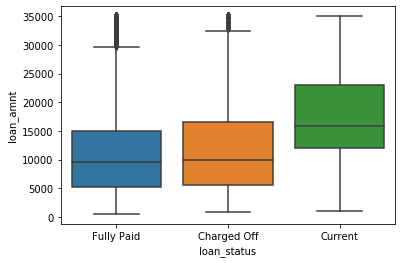

In [76]:
sns.boxplot(x=lending_club['loan_status'], y=lending_club['loan_amnt'])

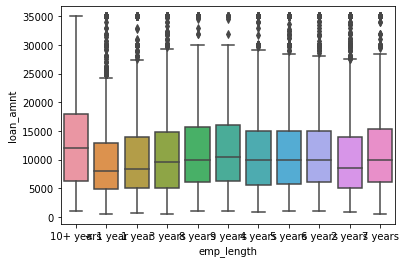

In [82]:
sns.boxplot(x=lending_club['emp_length'], y=lending_club['loan_amnt'])

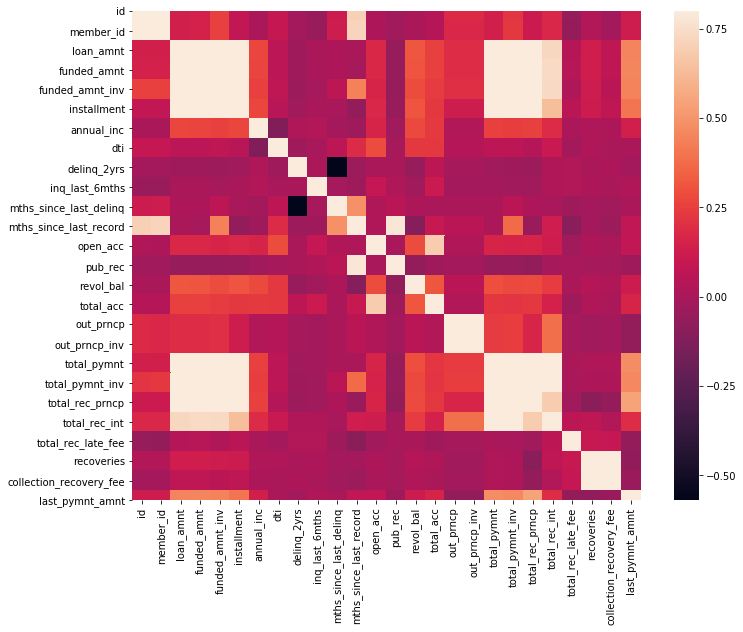

In [87]:
plt.subplots(figsize=(12, 9))
sns.heatmap(lending_club.corr(),vmax=.8, square=True)

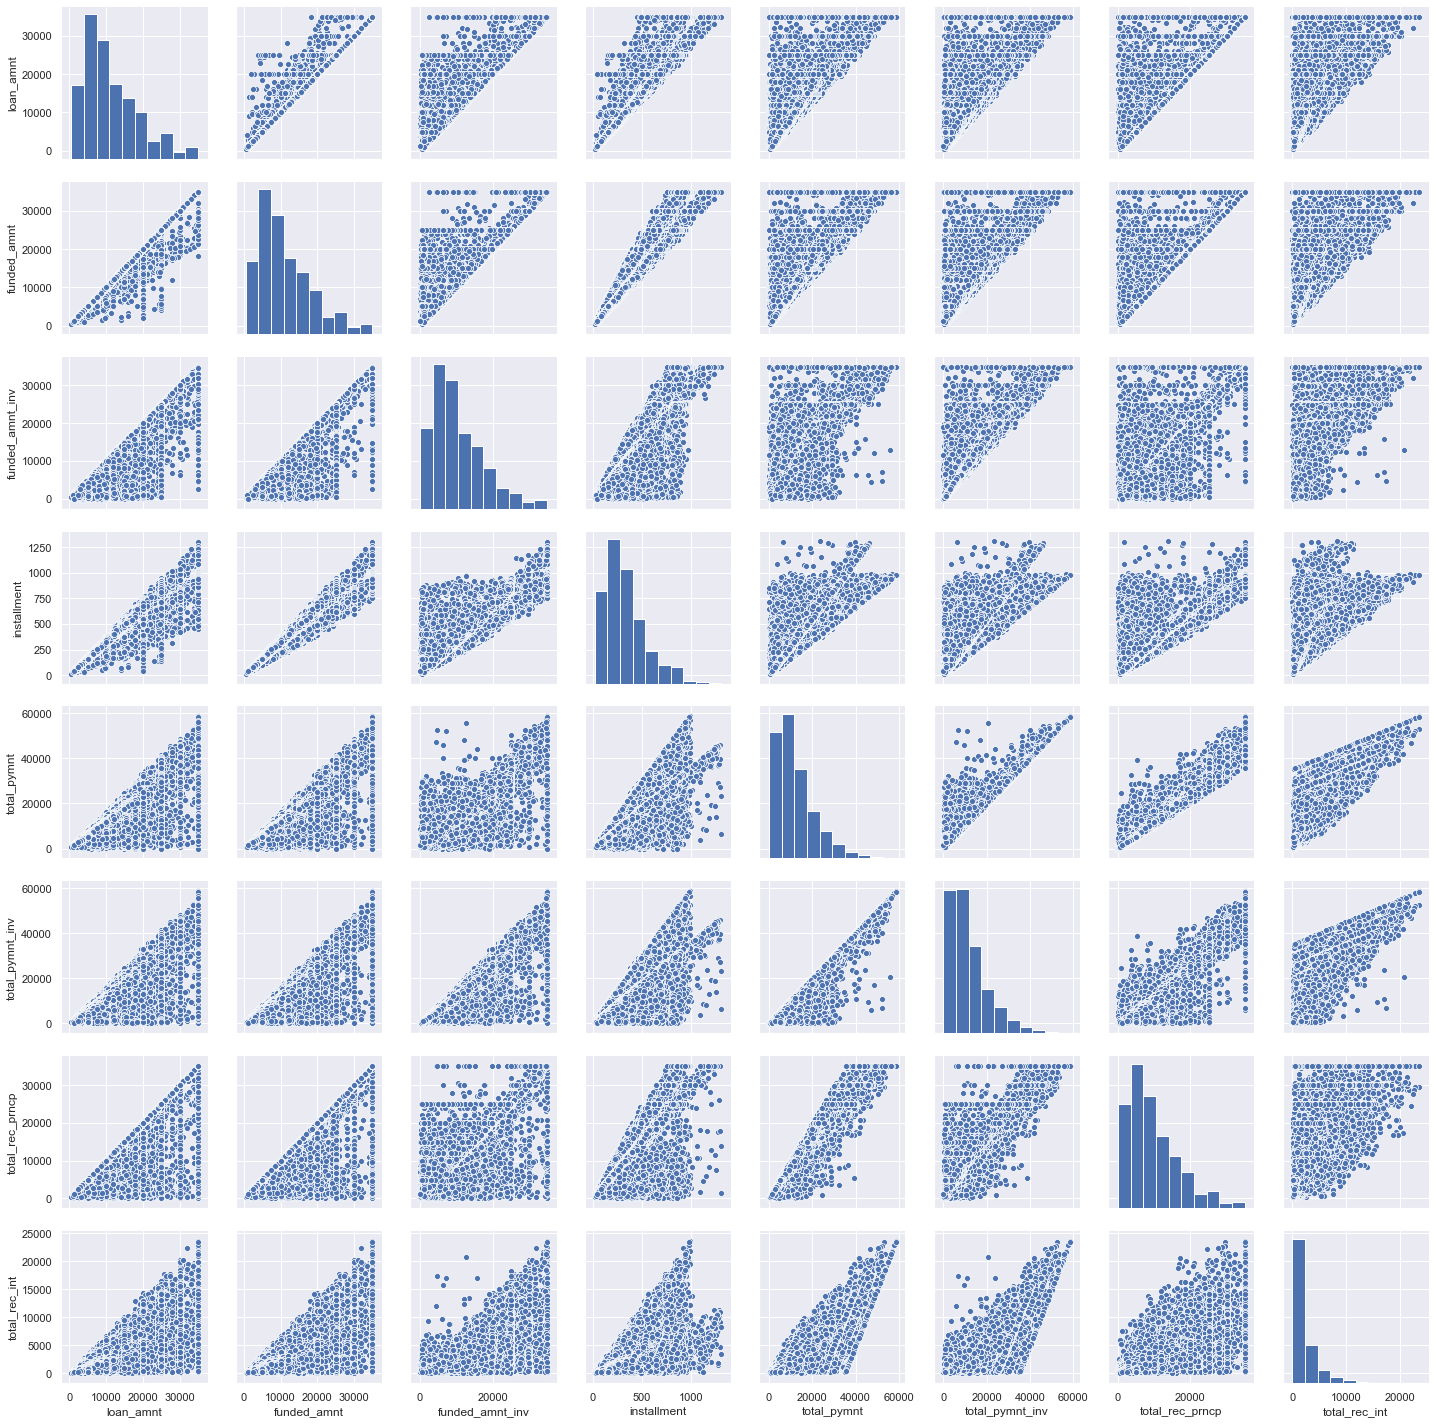

In [89]:
sns.set()
cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'total_pymnt', 
        'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int']
sns.pairplot(lending_club[cols], size = 2.5)
plt.show();